<a href="https://colab.research.google.com/github/Merey1508/Informational-retrieval/blob/main/Merey_Orazaly_IR_asn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://old.nu.edu.kz/wp-content/uploads/2016/09/NU-logo.png" width="200" height="222" >
<br>

<h1 style="text-align: center"> Information Retrieval HA 1 </h1>
<h1 style="text-align: center"> Analysis of the WikIR collection </h1>

<br>
<br>
<br>
<br>


<h3 style="text-align: left">Student:</h3>
<p style="text-align: left; font-size: 18px; margin-right: 49px;">Merey Orazaly (ID:202220288)</h3>

<h3 style="text-align: left">Professor:</h3>
<p style="text-align: left; font-size: 18px; margin-right: 49px;"> Pavel Braslavskii</p>

<br>
<br>
<p style="text-align: center; font-size: 18px; margin-right: 49px;">Astana, 2024</h3>
<br>
<br>
<br>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('documents.csv')
df

,id_right,text_right
0,1781133,it was used in landing craft during world war ...
1,2426736,after rejecting an offer from cambridge univer...
2,2224122,mat zan coached kuala lumpur fa in 1999 and wo...
3,219642,a barcode is a machine readable optical label ...
4,1728654,since the subordination of the monarchy under ...
...,...,...
88200,1419233,all believed in advancing socialist causes by ...
88201,717159,al rasheed arabic born january 30 1981 in riya...
88202,88356,his younger brothers were peter van brugh livi...
88203,1159014,is a musical with a book by edgar smith lyrics...


# Tasks
## Provide basic collection stats (20)

### 1. # documents

In [3]:
num_documents = len(df)
num_documents

88205

### 2. Collection size in words

In [4]:
collection_size = df['text_right'].apply(lambda x: len(x.split())).sum()
collection_size

17438811

### 3. Avg. document length in words

In [5]:
avg_doc_length = collection_size / num_documents
avg_doc_length

197.70773765659544

### 4. # unique words (types)

In [6]:
all_words = [word for text in df['text_right'] for word in text.split()]

unique_words = set(all_words)
num_unique_words = len(unique_words)
num_unique_words

339574

### 5. Avg. word length

In [7]:
total_characters = sum(len(word) for word in all_words)
avg_word_length = total_characters / len(all_words)
avg_word_length

4.7943026620335525

### 6. Avg. unique word (type) length

In [8]:
total_unique_characters = sum(len(word) for word in unique_words)
avg_unique_word_length = total_unique_characters / num_unique_words
avg_unique_word_length

7.506770247427659

## Build a frequency list (25)

### 1. Build a word frequency list, i.e. a list of unique words in the collection along with their counts (frequencies), sorted by decreasing counts.

In [9]:
word_freq = {}

for text in df['text_right']:
    words = text.split()
    for word in words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

for word, freq in sorted_word_freq:
    print(word, ":", freq)

Streaming output truncated to the last 5000 lines.
altstadtring : 1
grubert : 1
palmsche : 1
hofbuchhandlung : 1
andreasberg : 1
heidenr : 1
knab : 1
stehn : 1
sheckley : 1
greavette : 1
notings : 1
klenovskoye : 1
661610747140005 : 1
podyachev : 1
rotundal : 1
trehchetvertnyh : 1
bayernligas : 1
heatley : 1
pillans : 1
limulus : 1
bignotti : 1
runoffs : 1
intercar : 1
sa6 : 1
schapelle : 1
batswana : 1
marcoola : 1
2116 : 1
ebern : 1
rotenhan : 1
takatoki : 1
shigiyama : 1
overextension : 1
matsusaka : 1
adiabatically : 1
mechanochemical : 1
anodization : 1
pervasiveness : 1
earwolf : 1
hk500 : 1
fvs : 1
firedome : 1
powerflite : 1
daninos : 1
slano : 1
hrvatsko : 1
vije : 1
obrane : 1
maslenica : 1
zdrug : 1
dragoste : 1
zboi : 1
patul : 1
procust : 1
procrustes : 1
klvtradio : 1
weimhold : 1
krfw : 1
weihold : 1
kfrd : 1
kzzn : 1
braconids : 1
salaeng : 1
kaeng : 1
quicke : 1
buntika : 1
areekul : 1
rtqe : 1
putdownthatsciencepole : 1
lasarenko : 1
sargemakesloops : 1
soundengine : 

### 2. How many occurrences of stopwords are there in the collection?

In [10]:
stopword = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
len(stopword)

127

In [11]:
# Convert stopword list to a set for faster lookup
stop_words = set(stopword)

# Count occurrences of each stopword in the collection
stopword_counts = {}

for word in all_words:
    if word in stop_words:
        if word in stopword_counts:
            stopword_counts[word] += 1
        else:
            stopword_counts[word] = 1

# Total number of occurrences of stopwords
stopword_occurrences = sum(stopword_counts.values())
stopword_occurrences

7011299

In [12]:
# A dictionary to count word frequencies
word_freq = {}

# Count occurrences of each word
for word in all_words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Sort words by frequency in descending order and get top 30
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
sorted_word_freq[:30]

[('the', 1267270),
 ('of', 603941),
 ('in', 563262),
 ('and', 532368),
 ('a', 371670),
 ('to', 335070),
 ('was', 258040),
 ('he', 163325),
 ('is', 160548),
 ('as', 157404),
 ('for', 146924),
 ('on', 145969),
 ('with', 127822),
 ('by', 125737),
 ('s', 119289),
 ('at', 115546),
 ('his', 104832),
 ('from', 102038),
 ('it', 95128),
 ('that', 73406),
 ('an', 66558),
 ('which', 52816),
 ('first', 51527),
 ('were', 49042),
 ('are', 48682),
 ('has', 46336),
 ('she', 44884),
 ('also', 44600),
 ('after', 39869),
 ('its', 38237)]

### Do all top30 most frequent words occur in the stopword list? Would you recommend expanding the stopword list with some frequent words from the collection?

In [13]:
df_freq = pd.DataFrame(sorted_word_freq[:30], columns=['Word', 'Count'])
df_freq['In_Stopwords'] = df_freq['Word'].apply(lambda x: 'Yes' if x in stop_words else 'No')
df_freq

,Word,Count,In_Stopwords
0,the,1267270,Yes
1,of,603941,Yes
2,in,563262,Yes
3,and,532368,Yes
4,a,371670,Yes
5,to,335070,Yes
6,was,258040,Yes
7,he,163325,Yes
8,is,160548,Yes
9,as,157404,Yes


### Answer:
Among the top 30 most frequent words, 28 are present in the stopword list, while 2 words ("first" and "also") are not included. This analysis suggests that the current stopword list is largely comprehensive but could be expanded to include these frequent words to further improve text processing tasks.

### 3. Draw a plot of ranks vs. collection frequencies in log-log coordinates (Zipf’s law).

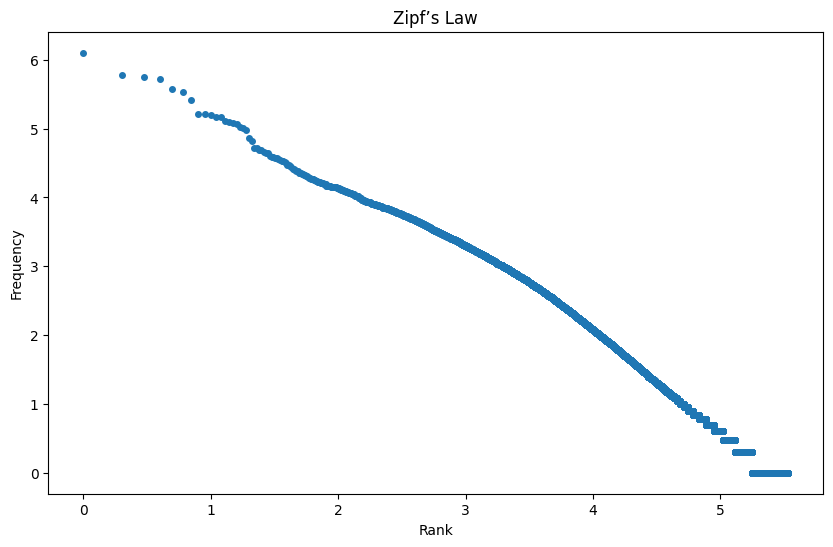

In [14]:
import matplotlib.pyplot as plt
import numpy as np

frequencies = [freq for _, freq in sorted_word_freq]
ranks = range(1, len(frequencies) + 1)

# Log-log scale
log_ranks = np.log10(ranks)
log_frequencies = np.log10(frequencies)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(log_ranks, log_frequencies, 'o', markersize=4)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf’s Law')
plt.show()

### 4. Draw a plot of vocabulary growth (unique words) in log-log coordinates (Heaps’ law).

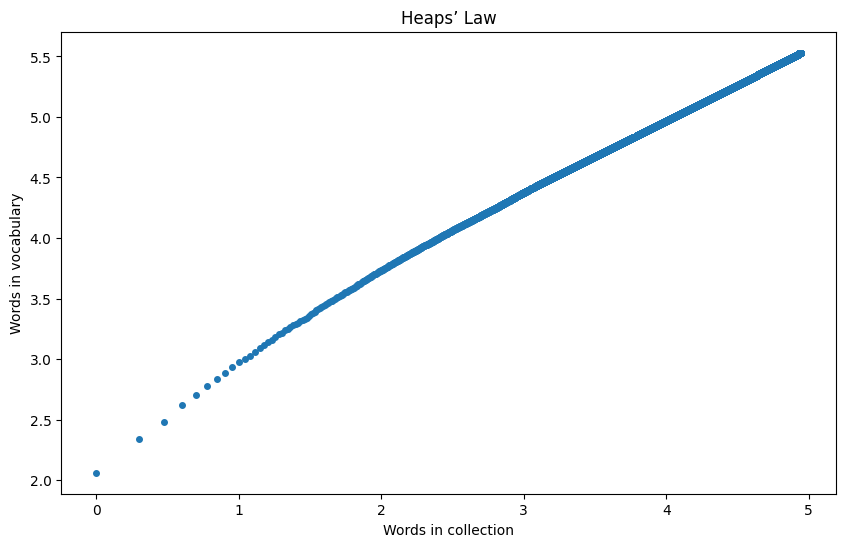

In [15]:
# Vocabulary growth
vocab_sizes = []
total_words = 0
unique_words_seen = set()

for text in df['text_right']:
    words = text.split()
    total_words += len(words)
    unique_words_seen.update(words)
    vocab_sizes.append(len(unique_words_seen))

# Log-log scale
log_total_words = np.log10(range(1, len(vocab_sizes) + 1))
log_vocab_sizes = np.log10(vocab_sizes)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(log_total_words, log_vocab_sizes, 'o', markersize=4)
plt.xlabel('Words in collection')
plt.ylabel('Words in vocabulary')
plt.title('Heaps’ Law')
plt.show()

## Build a frequency list of word bigrams (20)

### 1. How many unique bigrams are there in the collection?

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
bigram_freq = {}

for text in df['text_right']:
    words = nltk.word_tokenize(text.lower())
    bigrams = list(nltk.bigrams(words))
    for bigram in bigrams:
        if bigram in bigram_freq:
            bigram_freq[bigram] += 1
        else:
            bigram_freq[bigram] = 1

sorted_bigram_freq = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)
print("Number of unique bigrams: ", len(sorted_bigram_freq))

Number of unique bigrams:  4421685


### 2. Analyze the top of the list. Which bigrams would you keep as dictionary entries in the inverted index? Try to formalize the criteria.

In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
stop_words = set(stopwords.words('english'))

def is_useful_bigram(bigram):
    return (bigram[0] not in stop_words or bigram[1] not in stop_words)

filtered_bigram_freq = [(bigram, freq) for bigram, freq in sorted_bigram_freq if is_useful_bigram(bigram)]

print("Top bigrams after filtering stopwords:")
for bigram, freq in filtered_bigram_freq[:50]:
    print(bigram, ":", freq)

Top bigrams after filtering stopwords:
('the', 'first') : 24614
('one', 'of') : 16765
('part', 'of') : 13033
('the', 'united') : 11714
('united', 'states') : 11582
('was', 'born') : 10867
('university', 'of') : 10705
('the', 'university') : 9992
('new', 'york') : 9284
('member', 'of') : 9045
('born', 'in') : 8965
('as', 'well') : 8892
('known', 'as') : 8419
('the', 'new') : 7952
('well', 'as') : 7828
('the', 'city') : 7444
('high', 'school') : 7189
('the', 'second') : 7123
('the', 'national') : 6504
('due', 'to') : 6354
('a', 'member') : 6339
('served', 'as') : 6268
('according', 'to') : 6222
('moved', 'to') : 6200
('number', 'of') : 6085
('the', 'world') : 5962
('was', 'also') : 5875
('the', 'film') : 5789
('is', 'also') : 5751
('u', 's') : 5641
('the', 'name') : 5272
('his', 'first') : 5110
('became', 'a') : 5104
('the', 'company') : 5086
('the', 'town') : 5066
('his', 'father') : 5052
('world', 'war') : 4978
('was', 'released') : 4940
('end', 'of') : 4926
('the', 'song') : 4885
('th

### Answer:
Bigrams that are too generic and composed of common phrases should generally be excluded, as they add little value to the indexing process. Instead, priority should be given to bigrams that include proper nouns, names of entities, and terms that convey specific information. Based on these criteria, the bigrams **('united', 'states'), ('university', 'of'), ('new', 'york'), and ('known', 'as')** are recommended for inclusion in the inverted index, as they are more likely to enhance the effectiveness of search results by narrowing down the context and providing meaningful distinctions

## Morphological processing (35)

### 1. Use NLTK’s implementation of the Porter stemmer https://www.nltk.org/api/nltk.stem.porter.html to stem the collection.

In [27]:
import nltk
from nltk.stem.porter import *
from nltk.stem import PorterStemmer

In [28]:
porter_stemmer = PorterStemmer()

def stem_document(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [porter_stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

df['stemmed_text'] = df['text_right'].apply(stem_document)

In [29]:
df[['text_right', 'stemmed_text']].head()

,text_right,stemmed_text
0,it was used in landing craft during world war ...,it wa use in land craft dure world war ii and ...
1,after rejecting an offer from cambridge univer...,after reject an offer from cambridg univers sh...
2,mat zan coached kuala lumpur fa in 1999 and wo...,mat zan coach kuala lumpur fa in 1999 and won ...
3,a barcode is a machine readable optical label ...,a barcod is a machin readabl optic label that ...
4,since the subordination of the monarchy under ...,sinc the subordin of the monarchi under parlia...


### 2. Install spaCy https://spacy.io/, download the smallest trained English model (en_core_web_sm), see https://spacy.io/models/en. Lemmatize documents.

In [30]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [31]:
def lemmatize_document(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)

In [32]:
df['lemmatized_text'] = df['text_right'].apply(lemmatize_document)

In [33]:
df[['text_right', 'lemmatized_text']].head()

,text_right,lemmatized_text
0,it was used in landing craft during world war ...,it be use in landing craft during world war ii...
1,after rejecting an offer from cambridge univer...,after reject an offer from cambridge universit...
2,mat zan coached kuala lumpur fa in 1999 and wo...,mat zan coach kuala lumpur fa in 1999 and win ...
3,a barcode is a machine readable optical label ...,a barcode be a machine readable optical label ...
4,since the subordination of the monarchy under ...,since the subordination of the monarchy under ...


### 3. Provide basic stats for the stemmed/lemmatized versions of the collection.

In [34]:
def calculate_stats(text_column):
    num_documents = len(text_column)
    collection_size = text_column.apply(lambda x: len(x.split())).sum()
    avg_doc_length = collection_size / num_documents
    all_words = [word for x in text_column for word in x.split()]
    unique_words = set(all_words)
    num_unique_words = len(unique_words)
    total_characters = sum(len(word) for word in all_words)
    avg_word_length = total_characters / len(all_words)
    total_unique_characters = sum(len(word) for word in unique_words)
    avg_unique_word_length = total_unique_characters / num_unique_words

    return {
        'Documents number': num_documents,
        'Collection size in words': collection_size,
        'Average document length in words': avg_doc_length,
        'Unique words (types) number': num_unique_words,
        'Average word length': avg_word_length,
        'Average unique word (type) length': avg_unique_word_length
    }

In [35]:
original_stats = calculate_stats(df['text_right'])
stemmed_stats = calculate_stats(df['stemmed_text'])
lemmatized_stats = calculate_stats(df['lemmatized_text'])

stats_df = pd.DataFrame({
    'Original': original_stats,
    'Stemmed': stemmed_stats,
    'Lemmatized': lemmatized_stats
})

In [36]:
stats_df

,Original,Stemmed,Lemmatized
Documents number,8.820500e+04,8.820500e+04,8.820500e+04
Collection size in words,1.743881e+07,1.743962e+07,1.744167e+07
Average document length in words,1.977077e+02,1.977169e+02,1.977402e+02
Unique words (types) number,3.395740e+05,2.855070e+05,3.180710e+05
Average word length,4.794303e+00,4.264241e+00,4.586509e+00
Average unique word (type) length,7.506770e+00,7.050086e+00,7.403149e+00
